<a href="https://colab.research.google.com/github/dianaguerrero513/ProyectoEU3/blob/main/proyectoUNIDAD4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

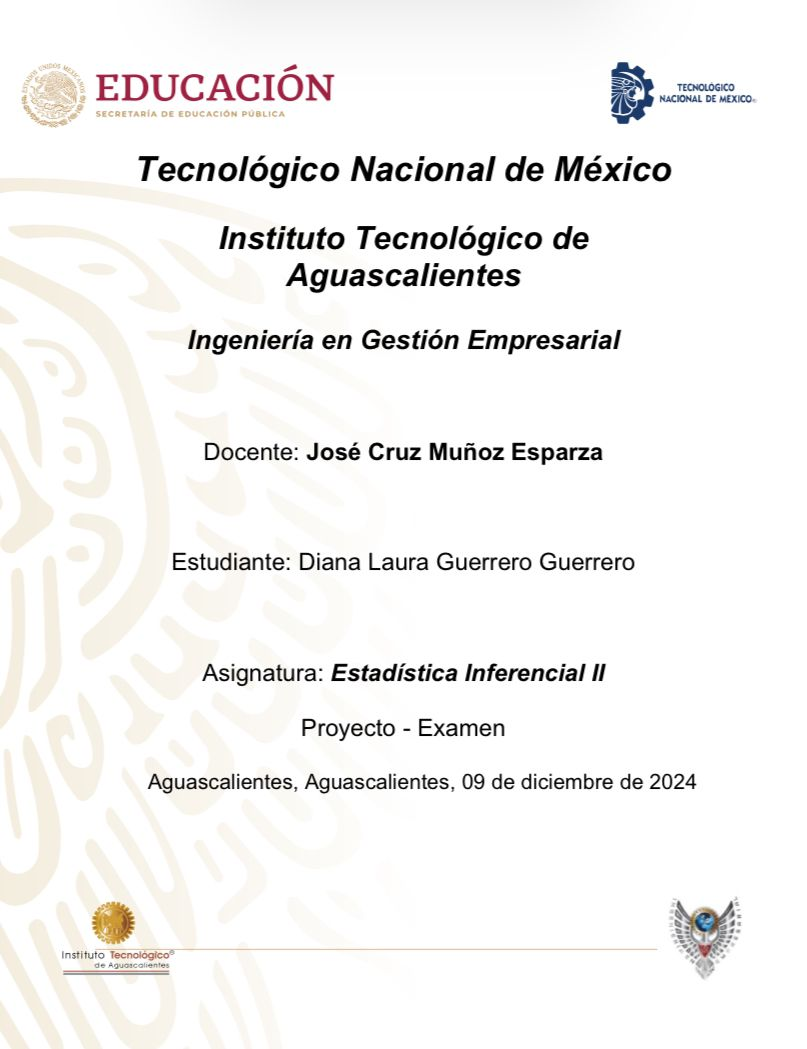

***INTRODUCCION***

En el desarrollo del presente documento se analiza el uso de las pruebas estadisticas como ANNOVA y Tukey en la comparación de diferencias en los datos de distintos grupos que se identifican como posibles amenazas para la calificación final de un exámen.A través de los resultados se compara si esta presente alguna diferencia entre el conjunto de datos ademas de que se brinda un tipo de retroalimentacion acorde al contexto anteriormente mencionado.



***Marco Teórico***

**Definición Estadístico ANOVA**

El análisis de la varianza (ANOVA) sirve para analizar si existe alguna diferencia entre las medias de más de dos poblaciones.

**Definición Estadístico Tukey**

Método que tiene como fin comparar las medias individuales provenientes de un análisis de varianza de varias muestras sometidas a tratamientos distintos.

**Definición Diseño de Experimentos (DOE) de un Factor**

Técnica estadística utilizada para investigar el efecto de un único factor o variable independiente en una respuesta o variable dependiente.

**Definición Index**

Conjunto ordenado de elementos que facilita la búsqueda y recuperación de información. Puede tomar diversas formas, desde un índice de un libro hasta un índice en una base de datos en línea.

**Definición Array**

Es una manera de poder guardar datos del mismo tipo o clase (Enteros, carácteres, booleanos, etc.).


METODOLOGÍA

Como primer paso tenemos que colocar nuestra base datos la cual será fundamental para el desarrollo de nuestro trabajo
df = pd.read_csv('**link base de datos**')
df.drop(columns=[], inplace = True)
df.dropna(inplace = True)
df

Luego de tener nuestras columnas definidas el desarrollo se torna mas particular pues, se seleccionan las variables de carácter cualitativo y la  unica variable a utilizar de caracter cuantitativo (en este caso puntaje_examen) y de manera individual se aplicarán los estadísticos ANOVA y Tukey, los cuales seran herramientas para identificar si existen diferencias en el conjunto de los datos y, poder observar en grupos espcificamente existen (respectivamente).


In [ ]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/dianaguerrero513/ProyectoEU3/refs/heads/main/dataset.csv')
df.drop(columns=[], inplace = True)
df.dropna(inplace = True)
df

,horas_estudio,asistencia,participacion_parental,acceso_a_recursos,actividades_extracurriculares,horas_suenio,calificaciones_previas,nivel_motivacion,acceso_internet,sesiones_tutoria,ingreso_familiar,calidad_profesorado,tipo_escuela,influencia_companieros,actividad_fisica,discapacidad_aprendizaje,nivel_estudio_padres,distancia,genero,puntaje_examen
0,23,84,bajo,elevado,no,7,73,bajo,si,0,bajo,medio,publico,positivo,3,no,preparatoria,cercano,hombre,67
1,19,64,bajo,medio,no,8,59,bajo,si,2,medio,bajo,publico,negativo,4,no,universidad,moderado,mujer,61
2,24,98,medio,bajo,si,7,91,medio,si,2,medio,bajo,publico,neutral,4,no,posgrado,cercano,hombre,74
3,29,89,bajo,medio,si,8,98,medio,si,1,medio,bajo,publico,negativo,4,no,preparatoria,moderado,hombre,71
4,19,92,medio,bajo,si,6,65,medio,si,3,medio,elevado,publico,neutral,4,no,universidad,cercano,mujer,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,elevado,medio,no,7,76,medio,si,1,elevado,medio,publico,positivo,2,no,preparatoria,cercano,mujer,68
6603,23,76,elevado,medio,no,8,81,medio,si,3,bajo,elevado,publico,positivo,2,no,preparatoria,cercano,mujer,69
6604,20,90,medio,bajo,si,6,65,bajo,si,3,bajo,medio,publico,negativo,2,no,posgrado,cercano,mujer,68
6605,10,86,elevado,elevado,si,6,91,elevado,si,2,bajo,medio,privado,positivo,3,no,preparatoria,lejano,mujer,68


In [ ]:
df.columns

Index(['horas_estudio', 'asistencia', 'participacion_parental',
       'acceso_a_recursos', 'actividades_extracurriculares', 'horas_suenio',
       'calificaciones_previas', 'nivel_motivacion', 'acceso_internet',
       'sesiones_tutoria', 'ingreso_familiar', 'calidad_profesorado',
       'tipo_escuela', 'influencia_companieros', 'actividad_fisica',
       'discapacidad_aprendizaje', 'nivel_estudio_padres', 'distancia',
       'genero', 'puntaje_examen'],
      dtype='object')

In [ ]:
df['participacion_parental'].unique()

array(['bajo', 'medio', 'elevado'], dtype=object)

In [ ]:
# Si todos los grupos tienen una dristribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['participacion_parental'] == 'bajo']['puntaje_examen'],
    df[df['participacion_parental'] == 'medio']['puntaje_examen'],
    df[df['participacion_parental'] == 'elevado']['puntaje_examen'],

)
# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 80.46
Valor p: 3.086484723306131e-35

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
   bajo elevado   1.7334   0.0  1.4042  2.0626   True
   bajo   medio   0.7344   0.0  0.4363  1.0326   True
elevado   medio   -0.999   0.0 -1.2636 -0.7344   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

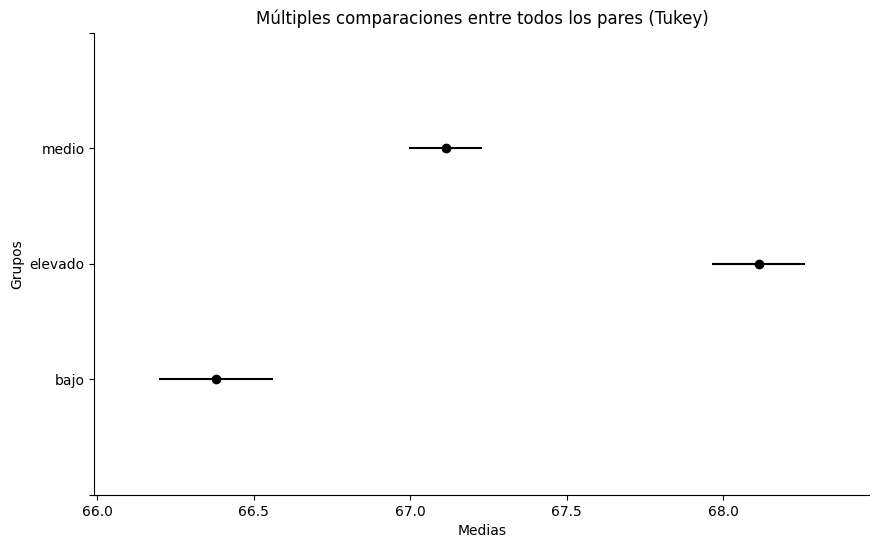

In [ ]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['participacion_parental'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Conclusion:gracias a la obtencion de los resultados luego de la aplicacion de los resultados se puede inferir que existe la posibilidad de una relacion en el puntaje del examen con la participacion parental pues los niveles medio y bajo son evidentemente mayores a el nivel bajo lo cual podria indicar un efecto negativo en el puntaje de examen.

In [ ]:
df['acceso_a_recursos'].unique()

array(['elevado', 'medio', 'bajo'], dtype=object)

In [ ]:
# Si todos los grupos tienen una dristribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['acceso_a_recursos'] == 'elevado']['puntaje_examen'],
    df[df['acceso_a_recursos'] == 'medio']['puntaje_examen'],
    df[df['acceso_a_recursos'] == 'bajo']['puntaje_examen'],

)
# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 77.74
Valor p: 4.409839909861347e-34

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
   bajo elevado   1.4212   0.0  1.1539  1.6885   True
   bajo   medio   0.6001   0.0  0.3157  0.8845   True
elevado   medio  -0.8211   0.0 -1.1309 -0.5113   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

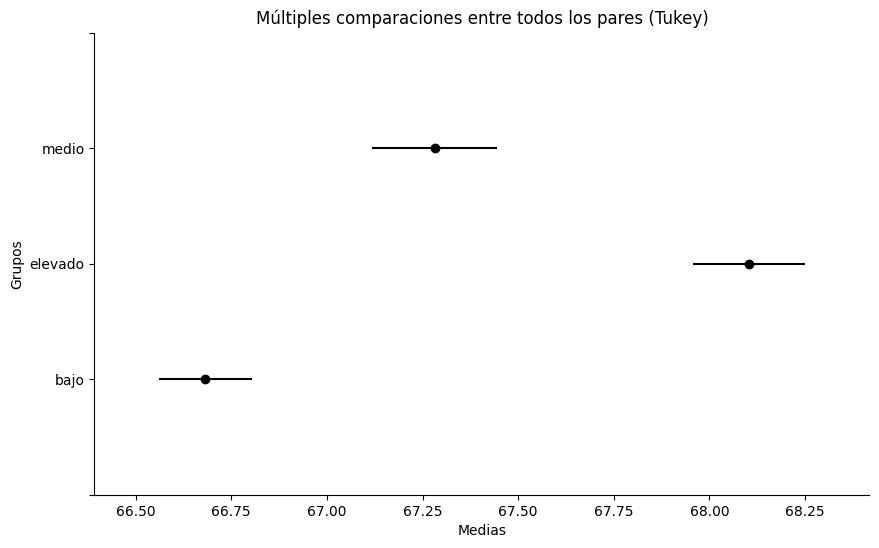

In [ ]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['acceso_a_recursos'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Conclusion: luego de la obtencion de los presentes resultados se puede apreciar que el acceso a recursos en la clasificación "elevado" y "medio" es relativamente mayor en comparacion a la clasificacion "bajo" lo cual podria indicar que la mayoria de los estudiantes cuenta con los recursos necesarios e incluso mas de lo basico para poder llevar a cabo sus estudios.

In [ ]:
df['actividades_extracurriculares'].unique()

array(['no', 'si'], dtype=object)

In [ ]:
# Si todos los grupos tienen una dristribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['actividades_extracurriculares'] == 'no']['puntaje_examen'],
    df[df['actividades_extracurriculares'] == 'si']['puntaje_examen'],

)
# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 25.46
Valor p: 4.6465544032283915e-07

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    no     si   0.5032   0.0 0.3077 0.6987   True
-------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

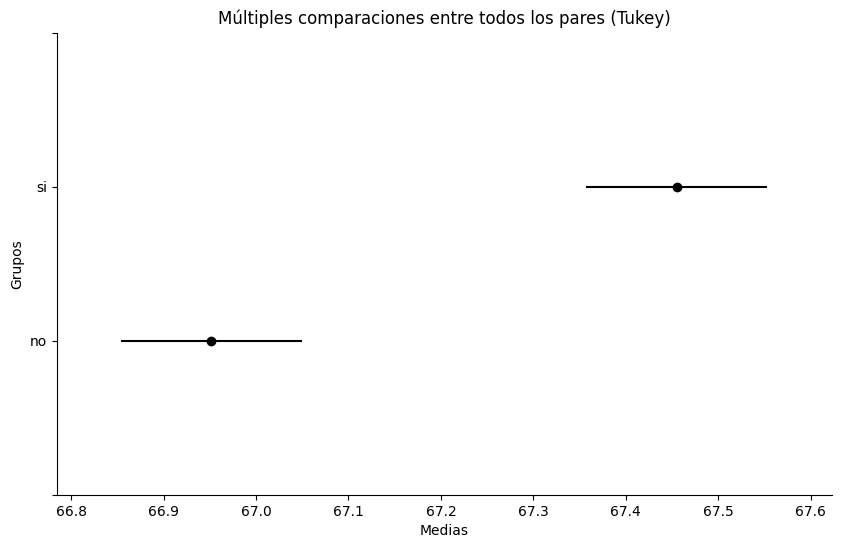

In [ ]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['actividades_extracurriculares'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Conclusion: acorde a los resultados en los cuales se presentan diferencias significativas se puede inferir que el tomar clases extracurriculares puede tener un impacto relevante sobre la variable asociada lo cual podria ser beneficioso en el puntaje final del examen.

In [ ]:
df['nivel_motivacion'].unique()

array(['bajo', 'medio', 'elevado'], dtype=object)

In [ ]:
# Si todos los grupos tienen una dristribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['nivel_motivacion'] == 'bajo']['puntaje_examen'],
    df[df['nivel_motivacion'] == 'medio']['puntaje_examen'],
    df[df['nivel_motivacion'] == 'elevado']['puntaje_examen'],

)
# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 25.54
Valor p: 9.000204034394693e-12

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
   bajo elevado   0.9794    0.0  0.6474 1.3115   True
   bajo   medio   0.5744    0.0  0.3086 0.8402   True
elevado   medio   -0.405 0.0048 -0.7071 -0.103   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

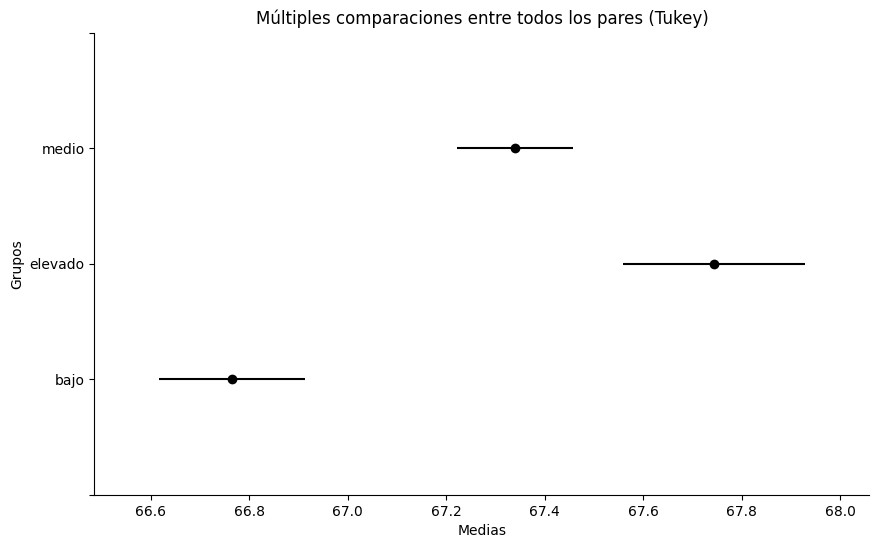

In [ ]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['nivel_motivacion'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Conclusion: en comparacion con las otras vraiables " bajo" y "medio" se puede observar que el nivel "alto" tiene una diferencia mayormente significativa sobre las otras dos lo cual podria indicar que la mayoria de los alumnos presentan un nivel alto de motivacion y que influye de manera significativa en el puntaje de su examen.

In [ ]:
df['acceso_internet'].unique()

array(['si', 'no'], dtype=object)

In [ ]:
# Si todos los grupos tienen una dristribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['acceso_internet'] == 'si']['puntaje_examen'],
    df[df['acceso_internet'] == 'no']['puntaje_examen'],

)
# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 16.71
Valor p: 4.4128283860948813e-05

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    no     si   0.7549   0.0 0.3929 1.1169   True
-------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

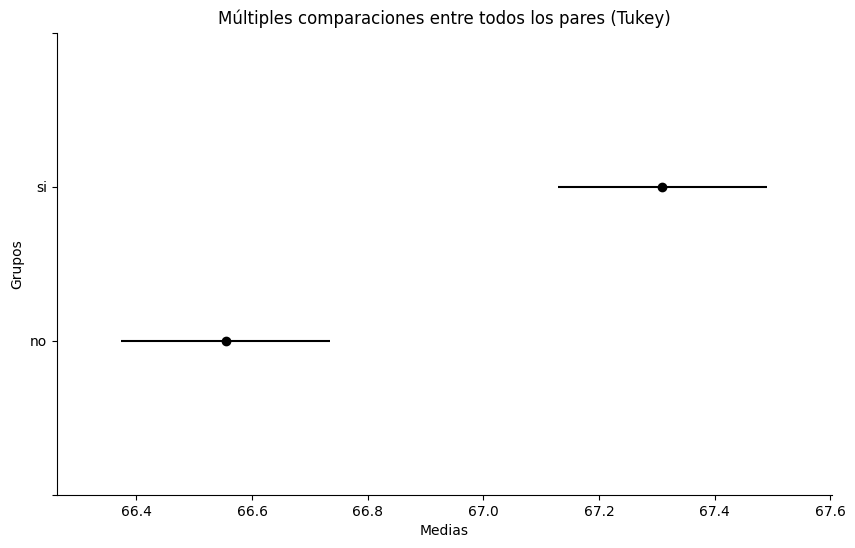

In [ ]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['acceso_internet'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Conclusion: el acceso a internet demuestra tener una diferencia significativa entre ambas clasificaciones, pues esta se encuentra por encima de la media lo cual podria indicar un desbalance en cuestion a las ventajas que pueda ofrecer esta herramienta en la aplicacion de sus estudios.


In [ ]:
df['ingreso_familiar'].unique()

array(['bajo', 'medio', 'elevado'], dtype=object)

In [ ]:
# Si todos los grupos tienen una dristribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['ingreso_familiar'] == 'bajo']['puntaje_examen'],
    df[df['ingreso_familiar'] == 'elevado']['puntaje_examen'],
    df[df['ingreso_familiar'] == 'medio']['puntaje_examen'],

)
# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 28.78
Valor p: 3.59767227814745e-13

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
   bajo elevado   0.9882    0.0  0.6717  1.3048   True
   bajo   medio   0.5178    0.0  0.2631  0.7725   True
elevado   medio  -0.4705 0.0015 -0.7873 -0.1536   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

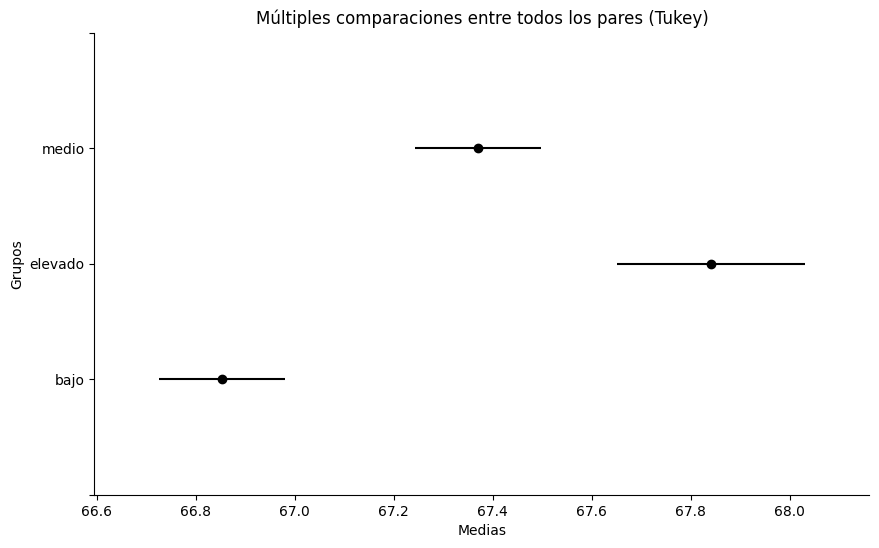

In [ ]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['ingreso_familiar'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Conclusion: nuevamente se puede observar la existencia de diferencias significativas dentro de este grupo de datos, pues en este caso el nivel elevado se encuentra más que por encima de los niveles bajo y medio, lo cual podria ser un indicador que la mayoría de este grupo de estudiantes no tiene problemas economicos y por lo tanto, al menos esta variable no causa un efecto de mucha relevancia.

In [ ]:
df['calidad_profesorado'].unique()

array(['medio', 'bajo', 'elevado'], dtype=object)

In [ ]:
# Si todos los grupos tienen una dristribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['calidad_profesorado'] == 'medio']['puntaje_examen'],
    df[df['calidad_profesorado'] == 'bajo']['puntaje_examen'],
    df[df['calidad_profesorado'] == 'elevado']['puntaje_examen'],


)
# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 17.12
Valor p: 3.844782377251745e-08

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
   bajo elevado   0.5447    0.0  0.2585  0.8309   True
   bajo   medio  -0.1345 0.4821 -0.4082  0.1392  False
elevado   medio  -0.6792    0.0 -0.9638 -0.3947   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

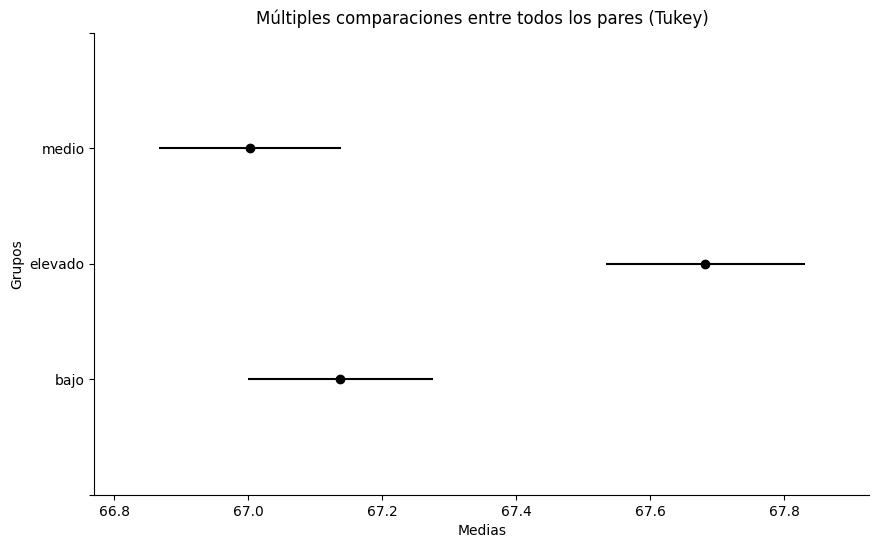

In [ ]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['calidad_profesorado'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Conclusion:debido a la naturaleza de los resultados se puede observar que la calidad del profesorado es relativamente mayor en comparacion a las otras dos clasificaciones que sin duda puede indicar un efecto significativo en como los  estudiantes son capaces de percibir con mayor facilidad el aprendizaje e incluso el nivel de competitividad que les genera.

In [ ]:
df['tipo_escuela'].unique()

array(['publico', 'privado'], dtype=object)

In [ ]:
# Si todos los grupos tienen una dristribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['tipo_escuela'] == 'publico']['puntaje_examen'],
    df[df['tipo_escuela'] == 'privado']['puntaje_examen'],


)
# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.7f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 0.75
Valor p: 0.3854988

Conclusión: No hay diferencias significativas entre los tratamientos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
privado publico  -0.0924 0.3855 -0.3011 0.1163  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

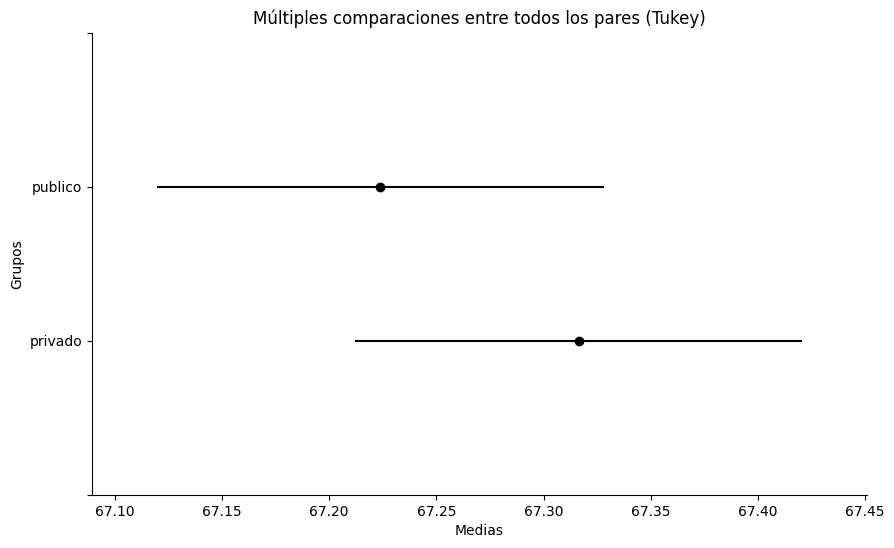

In [ ]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['tipo_escuela'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Conclusion: al no presentar diferencias significativas en estos grupos se puede realizar la hipotesis de que no existe relacion alguna del tipo de escuela con el puntaje de examen ya que de manera personal considero que no es lógico pues es posible que los metodos de enseñanza puedan ser distintos en ambos tipos.

In [ ]:
df['influencia_companieros'].unique()

array(['positivo', 'negativo', 'neutral'], dtype=object)

In [ ]:
# Si todos los grupos tienen una dristribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['influencia_companieros'] == 'positivo']['puntaje_examen'],
    df[df['influencia_companieros'] == 'negativo']['puntaje_examen'],
    df[df['influencia_companieros'] == 'neutral']['puntaje_examen'],

)
# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 32.18
Valor p: 1.2426130744876118e-14

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower  upper  reject
------------------------------------------------------
negativo  neutral   0.6329    0.0 0.3229 0.9429   True
negativo positivo   1.0538    0.0  0.745 1.3626   True
 neutral positivo   0.4209 0.0004 0.1638 0.6779   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

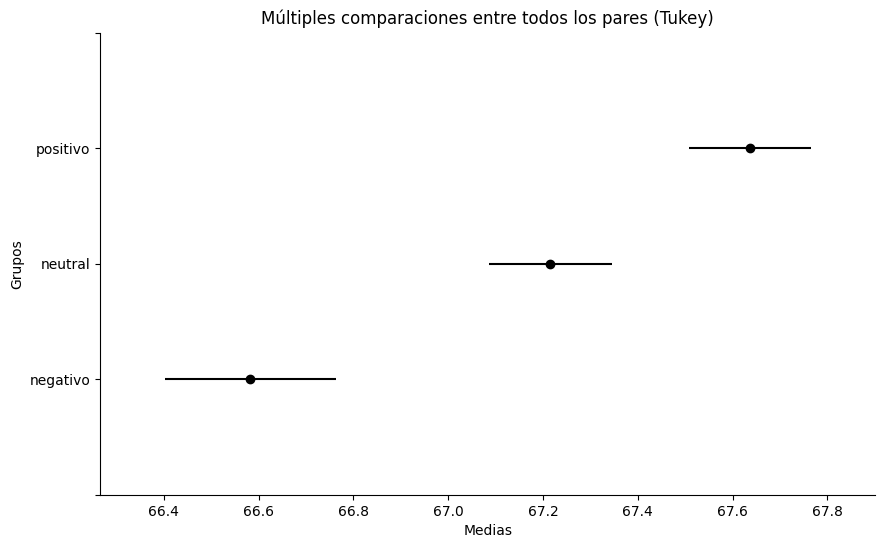

In [ ]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['influencia_companieros'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Conclusion: luego de observar la diferencia significativa entre los tres grupos
cada uno de ellos presenta una relevante contribucion en el puntaje de examen ya que, el estado animico en una persona y las influencias a su alrededor pues contribuir de manera postiva o no,en el desempeño de su trabajo.

In [ ]:
df['discapacidad_aprendizaje'].unique()

array(['no', 'si'], dtype=object)

In [ ]:
 #Si todos los grupos tienen una dristribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['discapacidad_aprendizaje'] == 'no']['puntaje_examen'],
    df[df['discapacidad_aprendizaje'] == 'si']['puntaje_examen'],

)
# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 45.21
Valor p: 1.9211255816201963e-11

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    no     si  -1.0725   0.0 -1.3852 -0.7598   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

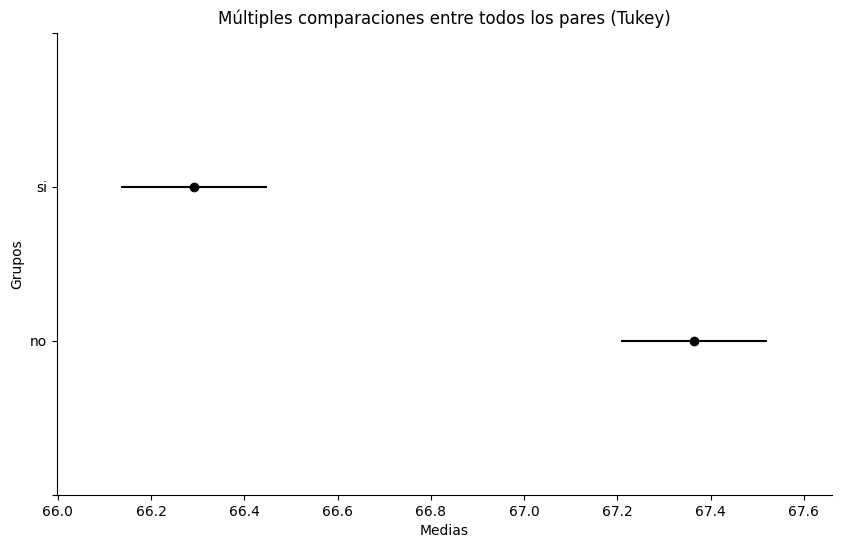

In [ ]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['discapacidad_aprendizaje'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Conclusion: la diferencia entre las medias de ambos grupos nos ayuda a relacionar el que la existencia de una discapacidad que  afecte de forma negativa el aprendizaje será motivo de relación directa con el desempeño academico debido a que cierto grupo de personas pueden necesitar otras herramientas para poder desarrollar y emplear su aprendizaje.

In [ ]:
df['nivel_estudio_padres'].unique()

array(['preparatoria', 'universidad', 'posgrado'], dtype=object)

In [ ]:
#Si todos los grupos tienen una dristribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['nivel_estudio_padres'] == 'preparatoria']['puntaje_examen'],
    df[df['nivel_estudio_padres'] == 'universidad']['puntaje_examen'],
    df[df['nivel_estudio_padres'] == 'posgrado']['puntaje_examen'],

)
# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 35.95
Valor p: 2.9904980898726883e-16

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
    posgrado preparatoria  -1.0778    0.0 -1.3801 -0.7754   True
    posgrado  universidad  -0.6142    0.0 -0.9429 -0.2856   True
preparatoria  universidad   0.4635 0.0001  0.2002  0.7268   True
----------------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

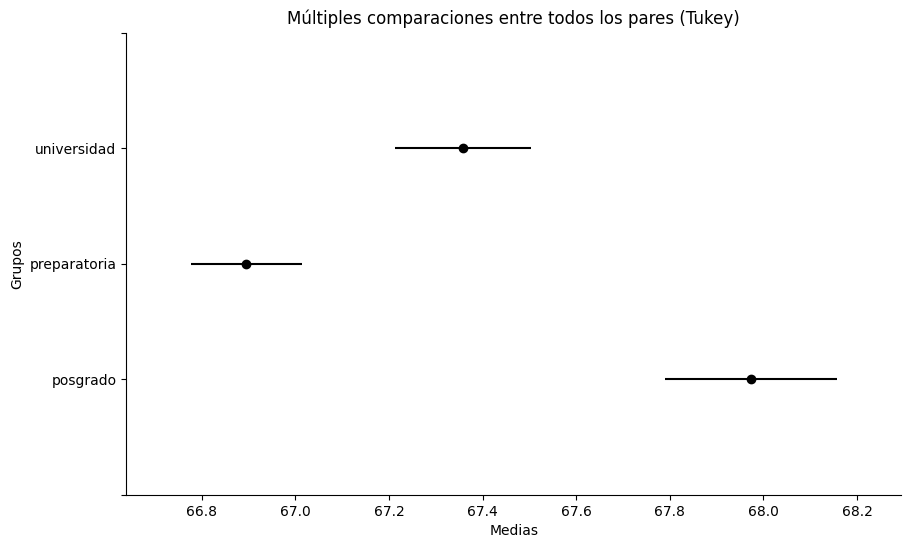

In [ ]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['nivel_estudio_padres'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Conclusion: a pesar de existir evidentes diferencias entre los tres gurpos sobre todo el de posgrados en comparacion con los otros dos (preparatoria, licenciatura) no es posible relacionarlo directamente con el puntaje de examen pues considero que la variable no es dependiente a este grupo.

In [ ]:
df['distancia'].unique()

array(['cercano', 'moderado', 'lejano'], dtype=object)

In [ ]:
#Si todos los grupos tienen una dristribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['distancia'] == 'cercano']['puntaje_examen'],
    df[df['distancia'] == 'moderado']['puntaje_examen'],
    df[df['distancia'] == 'lejano']['puntaje_examen'],

)
# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 24.94
Valor p: 1.6303083634793744e-11

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj  lower   upper  reject
------------------------------------------------------
cercano   lejano  -1.0154   0.0  -1.407 -0.6237   True
cercano moderado  -0.5272   0.0 -0.7822 -0.2722   True
 lejano moderado   0.4882 0.017  0.0705  0.9059   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

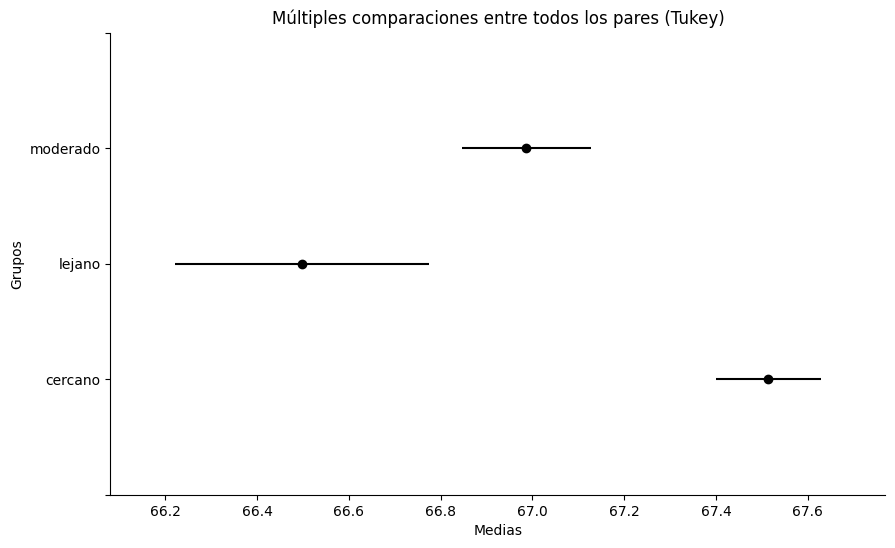

In [ ]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['distancia'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Conclusion: a pesar de que existen diferencias significativas entre los tres gurpos, personalmente no creo en la posibilidad de que exista relacion entre la distancia del lugar de vivienda con el puntaje de examen, ya que son rubros distintos cada uno perteneciente a otra clasificación.

In [ ]:
df['genero'].unique()

array(['hombre', 'mujer'], dtype=object)

In [ ]:
#Si todos los grupos tienen una dristribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['genero'] == 'hombre']['puntaje_examen'],
    df[df['genero'] == 'mujer']['puntaje_examen'],

)
# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.7f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 0.16
Valor p: 0.6936955

Conclusión: No hay diferencias significativas entre los tratamientos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
hombre  mujer   0.0391 0.6937 -0.1555 0.2337  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

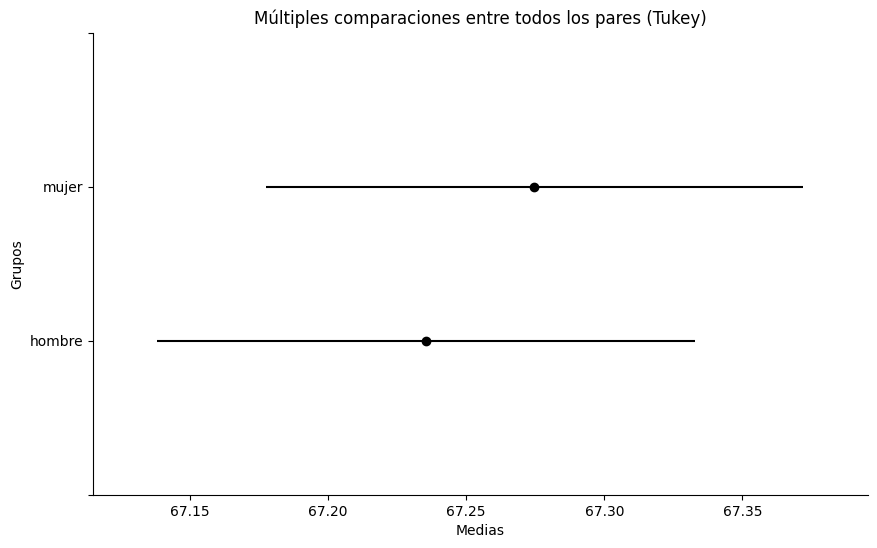

In [ ]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['genero'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Conclusion: debido a la naturaleza de las clasificaciones utlizadas (hombre, mujer) es evidente que eso no demuestra ninguna diferencia ni existe relacion alguna con respecto a su desempeño académico.

CONCLUSION GENERAL

En retroalimentación ANOVA y Tukey son excelentes complementos a la hora del diseño experimental de un factor, pues su uso lleva al descumbrimiento de las diferencias que puedan estar presentes en cualquier conjunto de datos como por ejemplo en este documento se evalua a la variables relacionadas directamente con el  rendimiento academico.
ANOVA es capaz de detectar si existen diferencias de manera general entre zmbos grupos, mientras que por otro lado la prueba de Tukey es mas detallista en cuestion a los pares que presentan dichas diferencias. Lo anterior es de suma importancia sobre todo en situaciones educativas, donde es posible analizar el nivel educativo de los padres, el accesso a internet, metodos de enseñanza, étc.
El uso de las ya mencionadas herramientas es basicamente formar parte de las decisiones y como sería su participación en una resolución de problemas practicos.